In [274]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from dateutil import parser

In [275]:
df_raw = pd.read_csv(r'base_de_dados.csv', encoding='latin1', sep=';')
df = df_raw.copy()
df_raw.head(10)

,ID,Nome,Critério,Tipo,Nota,Justificativa,DataAvaliacao
0,3000,pedro.henrique,"Ser ""team player""",Execução,NaN,"inovador, mas confuso","April 02, 2023"
1,3001,luiza.henrique,Atender Aos Prazos,EXECUÇÃO,"7,6",Boa Execução Com Erros Pontuais,"March 10, 2023"
2,3002,mariana.costa,Fazer Mais Com Menos,execução,Oito,"RESPONSÁVEL, PORÉM INSEGURO","April 18, 2023"
3,3003,,PENSAR FORA DA CAIXA,COMPORTAMENTAL,Seis,"trabalho em equipe precisa melhorar""""""",15/04/2023
4,3004,joana.silva,Resiliencia Nas Adversidades,Execução,Dez,"organizado, mas às vezes desatento",19.04.23
5,3005,ricardo.silva,RESILIENCIA NAS ADVERSIDADES,Execução,Oito,"reativo, falta proatividade",15/apr/23
6,3006,luiza.martins,Entregar com qualidade,Comportamental,Dez,"ENTREGA CONSISTENTE, MAS FALTA COMUNICAÇÃO",01.04.23
7,3007,bruno.lima,RESILIENCIA NAS ADVERSIDADES,COMPORTAMENTAL,"9,5","Criativo, porém pouco claro",31.03.2023
8,3008,joão.lima,Capacidade De Aprender,Comportamental,Oito,"Inovador, mas confuso",10.04.23
9,3009,ricardo.martins,Sentimento De Dono,COMPORTAMENTAL,NaN,"reativo, falta proatividade""""""",15.04.23


In [276]:
cmap = plt.get_cmap("crest")
palette = [cmap(i) for i in np.linspace(0, 1, 6)]
sns.set_palette(palette)

In [ ]:
df = df.applymap(lambda x: x.lower() if isinstance(x, str) else x)
df['Nota'] = df['Nota'].replace({
    'zero': 0, 'um': 1, 'dois': 2, 'três': 3, 'quatro': 4,
    'cinco': 5, 'seis': 6, 'sete': 7, 'oito': 8, 'nove': 9, 'dez': 10,
})

df['Nome'] = df['Nome'].str.rstrip()
df['Nome'] = df['Nome'].str.lstrip()
df['Tipo'] = df['Tipo'].str.lstrip()
df['Nome'] = df['Nome'].str.replace('.', ' ', regex=False)

df['Nota'] = pd.to_numeric(df['Nota'].astype(str).str.replace(',', '.', regex=False), errors='coerce')

df['Justificativa'] = df['Justificativa'].str.replace(r'"""$', '', regex=True)

df_sem_nomes = df[df['Nota'].isna()]
df = df.dropna(subset=['Nota'])

df = df[df['Nome'].str.strip().astype(bool)]

def parse_data_avaliacao(data_str):
    try:
        return parser.parse(str(data_str), dayfirst=True)
    except Exception:
        return pd.NaT 
df['DataAvaliacao'] = df['DataAvaliacao'].apply(parse_data_avaliacao)

df.columns = ['id', 'nome', 'criterio', 'tipo', 'nota', 'justificativa', 'data_avaliacao']

df.head(20)


,id,nome,criterio,tipo,nota,justificativa,data_avaliacao
1,3001,luiza henrique,atender aos prazos,execução,7.6,boa execução com erros pontuais,2023-03-10
2,3002,mariana costa,fazer mais com menos,execução,8.0,"responsável, porém inseguro",2023-04-18
4,3004,joana silva,resiliencia nas adversidades,execução,10.0,"organizado, mas às vezes desatento",2023-04-19
5,3005,ricardo silva,resiliencia nas adversidades,execução,8.0,"reativo, falta proatividade",2023-04-15
6,3006,luiza martins,entregar com qualidade,comportamental,10.0,"entrega consistente, mas falta comunicação",2023-04-01
7,3007,bruno lima,resiliencia nas adversidades,comportamental,9.5,"criativo, porém pouco claro",2023-03-31
8,3008,joão lima,capacidade de aprender,comportamental,8.0,"inovador, mas confuso",2023-04-10
12,3012,sofia martins,sentimento de dono,comportamental,7.1,"criativo, porém pouco claro",2023-03-23
13,3013,ana pereira,resiliencia nas adversidades,execução,6.2,"inovador, mas confuso",2023-04-15
15,3015,mariana silva,organização no trabalho,execução,8.4,trabalho em equipe precisa melhorar,2023-04-21


In [278]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 1 to 994
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id              730 non-null    int64         
 1   nome            730 non-null    object        
 2   criterio        730 non-null    object        
 3   tipo            730 non-null    object        
 4   nota            730 non-null    float64       
 5   justificativa   730 non-null    object        
 6   data_avaliacao  730 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1), object(4)
memory usage: 45.6+ KB


In [279]:
df.describe()

,id,nota
count,730.000000,730.000000
mean,3504.930137,8.072192
std,290.045542,1.260297
min,3001.000000,6.000000
25%,3248.500000,7.000000
50%,3504.000000,8.000000
75%,3758.750000,9.100000
max,3994.000000,10.000000


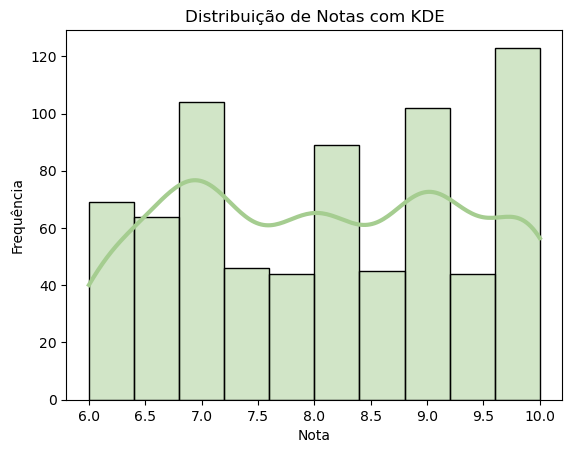

In [280]:
line_color = "#f9c74f"
sns.histplot(df['nota'], kde=True, bins=10, color=palette[0], edgecolor='black',
             line_kws={'color': line_color, 'linewidth': 3})

plt.title('Distribuição de Notas com KDE')
plt.xlabel('Nota')
plt.ylabel('Frequência')
plt.show()

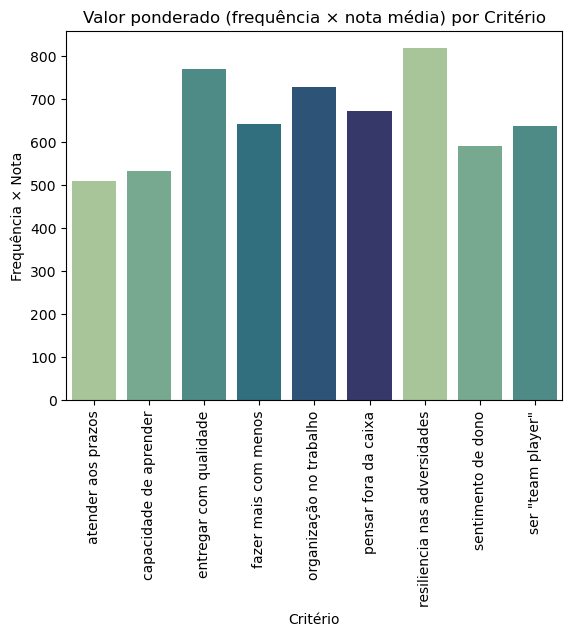

In [288]:
# First, convert 'nota' to numeric if it's not already
df['nota'] = pd.to_numeric(df['nota'], errors='coerce')

# Drop rows with missing nota or criterio
df_filtered = df.dropna(subset=['criterio', 'nota'])

# Group by criterio and multiply count by mean nota (or sum nota)
grouped = df_filtered.groupby('criterio')['nota'].agg(['count', 'mean'])
grouped['weighted'] = grouped['count'] * grouped['mean']
grouped = grouped.reset_index()

# Plot the weighted value
sns.barplot(data=grouped, x='criterio', y='weighted', palette=palette)
plt.xticks(rotation=90)
plt.title('Valor ponderado (frequência × nota média) por Critério')
plt.xlabel('Critério')
plt.ylabel('Frequência × Nota')
plt.show()


In [281]:
nomes = df[['id', 'nome']].drop_duplicates()
evaluations = df.drop(columns=['nome'])
evaluations.to_csv('evalutaions.csv', index=False, sep=';')
nomes.to_csv('id_name.csv', index=False, sep=';')


In [282]:
nomes.head(10)

,id,nome
1,3001,luiza henrique
2,3002,mariana costa
4,3004,joana silva
5,3005,ricardo silva
6,3006,luiza martins
7,3007,bruno lima
8,3008,joão lima
12,3012,sofia martins
13,3013,ana pereira
15,3015,mariana silva


In [283]:
evaluations.head(10)

,id,criterio,tipo,nota,justificativa,data_avaliacao
1,3001,atender aos prazos,execução,7.6,boa execução com erros pontuais,2023-03-10
2,3002,fazer mais com menos,execução,8.0,"responsável, porém inseguro",2023-04-18
4,3004,resiliencia nas adversidades,execução,10.0,"organizado, mas às vezes desatento",2023-04-19
5,3005,resiliencia nas adversidades,execução,8.0,"reativo, falta proatividade",2023-04-15
6,3006,entregar com qualidade,comportamental,10.0,"entrega consistente, mas falta comunicação",2023-04-01
7,3007,resiliencia nas adversidades,comportamental,9.5,"criativo, porém pouco claro",2023-03-31
8,3008,capacidade de aprender,comportamental,8.0,"inovador, mas confuso",2023-04-10
12,3012,sentimento de dono,comportamental,7.1,"criativo, porém pouco claro",2023-03-23
13,3013,resiliencia nas adversidades,execução,6.2,"inovador, mas confuso",2023-04-15
15,3015,organização no trabalho,execução,8.4,trabalho em equipe precisa melhorar,2023-04-21


In [285]:
df['criterio'].unique()

array(['atender aos prazos', 'fazer mais com menos',
       'resiliencia nas adversidades', 'entregar com qualidade',
       'capacidade de aprender', 'sentimento de dono',
       'organização no trabalho', 'ser "team player"',
       'pensar fora da caixa'], dtype=object)